<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [5]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

URLError: <urlopen error [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера>

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [ ]:
df.head(11)

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [ ]:
#Частотный график для Freedom
n, bins, patches = plt.hist(df['Freedom'], 20, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график Freedom (разбиение интервала по 20 элементов,\n распределение равномерное)')
plt.grid(True)
plt.show()

#Частотный график для Positive affect
n, bins, patches = plt.hist(df['Positive affect'], 20, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала по 20 элементов,\n распределение равномерное)')
plt.grid(True)
plt.show()

#Тип рапределения для обоих параметров: РАВНОМЕРНОЕ

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [11]:
#проверка отсутствующих значений в колонке Freedom
df.Freedom.isnull().sum()
#удаление строк, содержащих пустые значения в колонке Freedom
df = df.dropna(subset=['Freedom'])
df.Freedom.isnull().sum()


#медиана
print('Медиана: ', statistics.median(df.Freedom))

#математическое ожидание (среднее значение)
print('Математическое ожидание: ', statistics.mean(df.Freedom))

#стандартное отклонение
print('Стандартное отклонение: ' , statistics.pstdev(df.Freedom))

#дисперсия
print('Дисперсия: ' , statistics.pvariance(df.Freedom))

#минимум
print('Минимум: ' , df.Freedom.min())

#максимум
print('Максимум: ', df.Freedom.max())

#размах
print('Размах: ', df.Freedom.max() - df.Freedom.min())

#выбросы

#Выбросы - либо переменной нет в таблице, либо значение слишком варьируется от среднего значения выборки.
#Строка с отсутствующей переменной была удалена выше. Остальные значения в колонке -
#это последовательный ряд чисел от 1 до 155, поэтому выбросов здесь не может быть.

Медиана:  78.0
Математическое ожидание:  78.0
Стандартное отклонение:  44.74371464239419
Дисперсия:  2002.0
Минимум:  1.0
Максимум:  155.0
Размах:  154.0


Почему нельзя найти моду?

In [12]:

# Мо́да — значение во множестве наблюдений, которое встречается наиболее часто.
# В данном dataframe значения в столбце Freedom - уникальны, т.е. нет повторений. Поэтому мода не определяется.

print('Количество строк в df: ', df.shape[0])
print('Количество уникальных значений в столбце Freedom: ', len(df.Freedom.unique()))

Количество строк в df:  155
Количество уникальных значений в столбце Freedom:  155


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

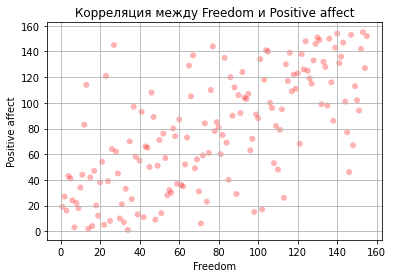

Коэффициент Пирсона =  0.6817698430601656
Зависимость между двумя переменными прямая


In [13]:
from scipy.stats import pearsonr

#корреляция между Freedom и Positive affect графически

freedom = df['Freedom']
positive_affect = df['Positive affect']

plt.scatter(freedom, positive_affect, c='red', alpha=0.3, edgecolors='none')
plt.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Корреляция между Freedom и Positive affect')
plt.show()

#корреляция между Freedom и Positive affect математически

corr, p_value = pearsonr(freedom, positive_affect)
print('Коэффициент Пирсона = ', corr)

if corr > 0:
    print('Зависимость между двумя переменными прямая')
if corr < 0:
    print('Зависимость между двумя переменными обратная')

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [15]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Freedom']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0
0,0.025974
1,0.032468
2,0.012987
3,0.038961
4,0.116883


Построить матрицу корреляций для всех колонок таблицы

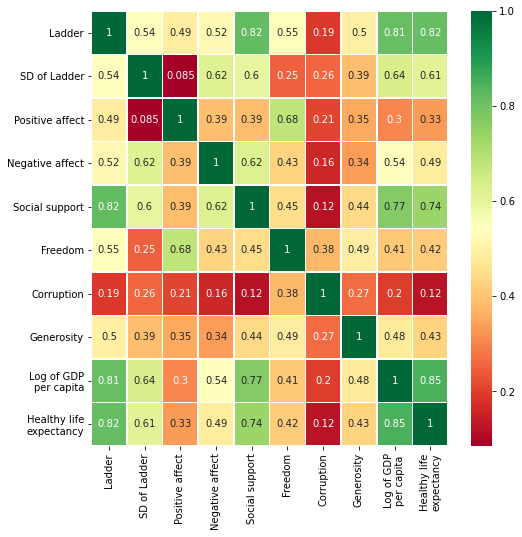

In [16]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.5) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(8,8)
plt.show()

Загрузить таблицу цен на авокадо: 

In [18]:
df=pd.read_csv('data/avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

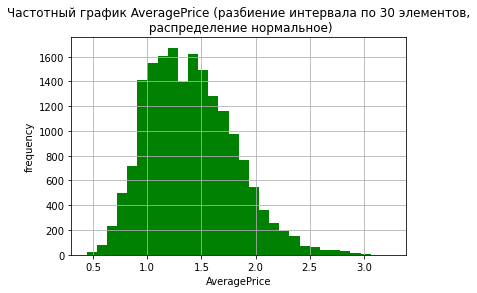

In [19]:
n, bins, patches = plt.hist(df['AveragePrice'], 30, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.title('Частотный график AveragePrice (разбиение интервала по 30 элементов,\n распределение нормальное)')
plt.grid(True)
plt.show()

#Тип рапределения для AveragePrice: НОРМАЛЬНОЕ

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [20]:
#Коэффициенты корреляции

print('Коэффициент ПИРСОНА:')
corr, p_value = pearsonr(df['4046'], df['AveragePrice'])
print('колонки 4046 и AveragePrice: %.3f' % corr)
corr, p_value = pearsonr(df['4225'], df['AveragePrice'])
print('колонки 4225 и AveragePrice: %.3f' % corr)
corr, p_value = pearsonr(df['4770'], df['AveragePrice'])
print('колонки 4770 и AveragePrice: %.3f' % corr)

print('\nКоэффициент СПИРМЕНА:')
coef, p = sts.spearmanr(df['4046'], df['AveragePrice'])
print('колонки 4046 и AveragePrice: %.3f' % coef)
coef, p = sts.spearmanr(df['4225'], df['AveragePrice'])
print('колонки 4225 и AveragePrice: %.3f' % coef)
coef, p = sts.spearmanr(df['4770'], df['AveragePrice'])
print('колонки 4770 и AveragePrice: %.3f' % coef)

print('\nКоэффициент КЕНДАЛЛА:')
coef, p = sts.kendalltau(df['4046'], df['AveragePrice'])
print('колонки 4046 и AveragePrice: %.3f' % coef)
coef, p = sts.kendalltau(df['4225'], df['AveragePrice'])
print('колонки 4225 и AveragePrice: %.3f' % coef)
coef, p = sts.kendalltau(df['4770'], df['AveragePrice'])
print('колонки 4770 и AveragePrice: %.3f' % coef)

#Выводы: 
#Корреляция для всех вариантов - обратная (коэффициенты меньше нуля). 
#Коэффициенты корреляции Пирсона - близки к нулю, значит сила линейной взаимосвязи между переменными низкая.
#Коэффициенты коррекляции Спирмена и Кендалла - выше, значит ранговая зависимость у показателей выше, чем линейная, 
#но вместе с тем все равно низкая.

Коэффициент ПИРСОНА:
колонки 4046 и AveragePrice: -0.208
колонки 4225 и AveragePrice: -0.173
колонки 4770 и AveragePrice: -0.179

Коэффициент СПИРМЕНА:
колонки 4046 и AveragePrice: -0.596
колонки 4225 и AveragePrice: -0.514
колонки 4770 и AveragePrice: -0.533

Коэффициент КЕНДАЛЛА:
колонки 4046 и AveragePrice: -0.417
колонки 4225 и AveragePrice: -0.344
колонки 4770 и AveragePrice: -0.375
